<a href="https://colab.research.google.com/github/LujainOwaimer/exam/blob/main/Copy_of_Clustering_Task_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline


## Load the Data

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/Traffic_Accidents.csv')

In [4]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1.0,1.0,27/11/2009,6.0,...,-1.0,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009.0
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2.0,1.0,10/10/2010,1.0,...,6.0,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010.0
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2.0,1.0,14/09/2005,4.0,...,3.0,4055.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005.0
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1.0,2.0,18/08/2007,7.0,...,6.0,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007.0
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2.0,2.0,06/08/2013,3.0,...,-1.0,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12953 entries, 0 to 12953
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        12953 non-null  float64
 1   Location_Northing_OSGR                       12953 non-null  float64
 2   Longitude                                    12953 non-null  float64
 3   Latitude                                     12953 non-null  float64
 4   Police_Force                                 12953 non-null  int64  
 5   Accident_Severity                            12860 non-null  float64
 6   Number_of_Vehicles                           12952 non-null  float64
 7   Number_of_Casualties                         12669 non-null  float64
 8   Date                                         12953 non-null  object 
 9   Day_of_Week                                  12952 non-null  float64
 10  Loc

In [14]:
df.shape

(12953, 26)

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [5]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,12954.000000,1.295400e+04,12954.000000,12954.000000,12954.000000,12861.000000,12953.000000,12670.000000,12953.000000,12953.000000,12953.000000,12953.000000,12953.000000,12953.000000,12953.000000,12929.000000,12953.000000
mean,440661.778447,2.995216e+05,-1.421413,52.583548,30.390459,2.837104,1.841349,1.363694,4.137497,349.344553,4.081912,1015.600247,39.176253,2.645642,363.158882,1.356949,2009.393114
std,95456.798326,1.613505e+05,1.402294,1.453116,25.600484,0.404075,0.714654,0.862754,1.927342,259.683558,1.434489,1829.939970,14.253914,3.211933,1261.690765,0.479118,2.999180
min,145640.000000,1.903000e+04,-6.193033,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375008.750000,1.778425e+05,-2.372936,51.486144,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,441836.500000,2.666150e+05,-1.380100,52.288767,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,132.000000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,524077.500000,3.983825e+05,-0.206367,53.480331,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,735.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654950.000000,1.183525e+06,1.753632,60.532880,98.000000,3.000000,10.000000,42.000000,7.000000,940.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,2.000000,2014.000000


In [73]:
df.isnull().sum()

,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Day_of_Week,0
Local_Authority_(District),0
Local_Authority_(Highway),0
1st_Road_Class,0


In [57]:
df['Days_Since_Start'] = (df['Date'] - df['Date'].min()).dt.days
df = df.drop('Date', axis=1)

KeyError: 'Date'

In [47]:
# For categorical columns, fill with the mode (most frequent value)
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [30]:
df.duplicated().sum()

0

In [31]:
df = df.drop_duplicates()

# Delete unnecessary columns

In [ ]:
column_to_drop = ['Did_Police_Officer_Attend_Scene_of_Accident',
                  'Location_Easting_OSGR',
                  'Location_Northing_OSGR',
                  '1st_Road_Number',
                  '2nd_Road_Number',
                  'Pedestrian_Crossing-Human_Control',
                  'Pedestrian_Crossing-Physical_Facilities',
                  '2nd_Road_Class',
                  'Year'
                  ]
df = df.drop(column_to_drop, axis=1)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [78]:
numeric_cols = df.select_dtypes(include=['number']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

IQR = Q3 - Q1

df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [79]:
df['1st_Road_Class'].fillna(df['1st_Road_Class'].mode()[0], inplace=True)
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0], inplace=True)
df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0], inplace=True)

df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].mean(), inplace=True)
df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean(), inplace=True)
df['Speed_limit'].fillna(df['Speed_limit'].mean(), inplace=True)
df['Accident_Severity'].fillna(df['Accident_Severity'].mode()[0], inplace=True)
df['Local_Authority_(District)'].fillna(df['Local_Authority_(District)'].mode()[0], inplace=True)

In [80]:
df = df.drop('2nd_Road_Class', axis=1)

KeyError: "['2nd_Road_Class'] not found in axis"

In [81]:
'Days_Since_Start'
print(df['Days_Since_Start'].describe())

count    1.894000e+03
mean     1.793414e+03
std      4.548674e-13
min      1.793414e+03
25%      1.793414e+03
50%      1.793414e+03
75%      1.793414e+03
max      1.793414e+03
Name: Days_Since_Start, dtype: float64


In [82]:
mean_value = df['Days_Since_Start'].mean()
df['Days_Since_Start'].fillna(mean_value, inplace=True)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [84]:
# Selecting relevant features for clustering (Longitude, Latitude, and Accident Severity)
features = ['Longitude', 'Latitude', 'Accident_Severity']
selected_data = df[features].copy()

# Scaling the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_data)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

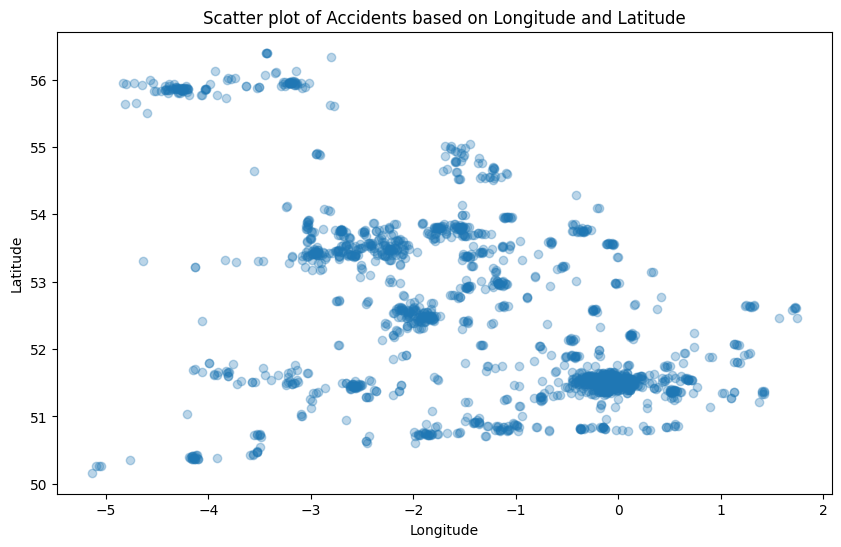

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.3)
plt.title('Scatter plot of Accidents based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

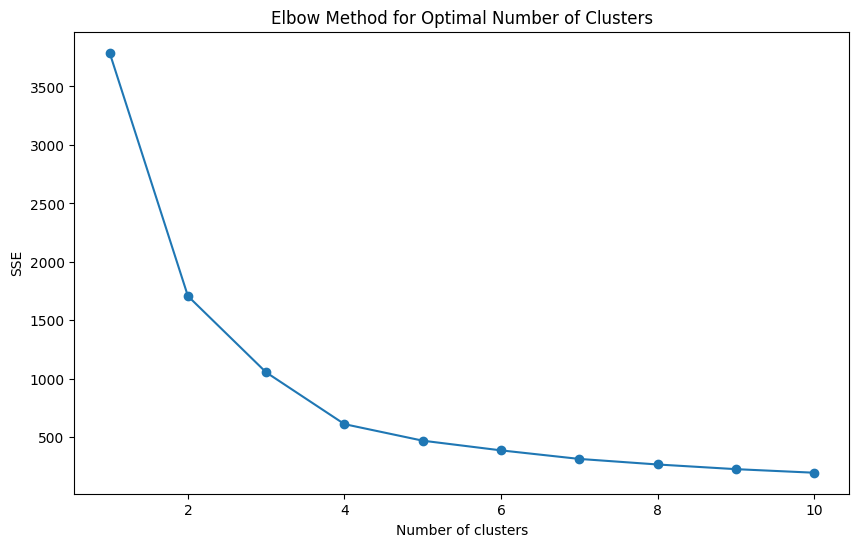

In [86]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [90]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(scaled_features)

KMeans(n_clusters=3, n_init='auto')

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [91]:
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.618334911025082


## Plot the data points with their predicted cluster center

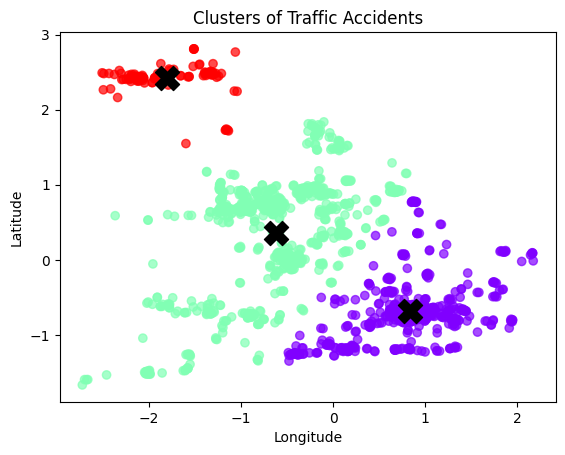

In [112]:
# Plotting the clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='rainbow', alpha=0.7)

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='X')

plt.title('Clusters of Traffic Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?